In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce
from PIL import Image
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
df.shape

(8555, 3)

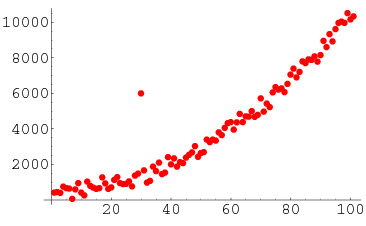

In [5]:
img = Image.open('outlier.jpg')
img

<AxesSubplot: xlabel='Weight', ylabel='Count'>

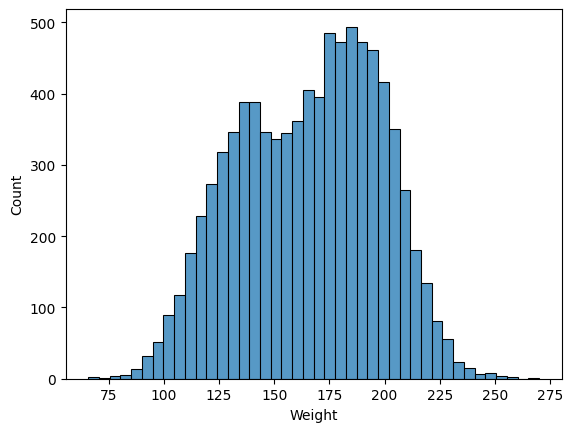

In [6]:
sns.histplot(df['Weight'], kde=False)

<AxesSubplot: xlabel='Weight', ylabel='Count'>

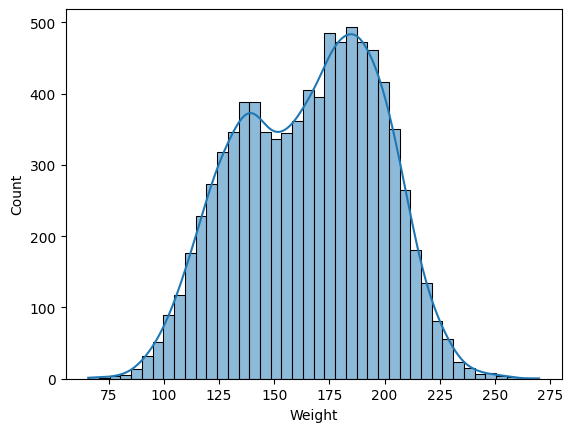

In [7]:
sns.histplot(df['Weight'], kde=True)

In [8]:
mean_value = df['Weight'].mean()
mean_value

165.6327353266768

In [9]:
std_value = df['Weight'].std()
std_value

32.04392221721551

In [10]:
std_3_plus = mean_value + (3*std_value)
std_3_plus

261.7645019783233

In [11]:
std_3_neg = mean_value - (3*std_value)
std_3_neg

69.50096867503026

In [12]:
df[df['Weight'] > std_3_plus]

,Gender,Height,Weight
2014,Male,78.998742,269.989698


In [13]:
df[df['Weight'] < std_3_neg]

,Gender,Height,Weight
151,Male,65.350411,65.78000
160,Male,64.333648,68.64000
5360,Female,55.668202,68.98253


In [14]:
# Merge two type of outliers
merge_outliers = df[(df['Weight'] > std_3_plus) | (df['Weight'] < std_3_neg)]
merge_outliers

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
2014,Male,78.998742,269.989698
5360,Female,55.668202,68.982530


In [15]:
merge_outliers.shape

(4, 3)

In [16]:
remove_out_columns = df[(df['Weight'] < std_3_plus) & (df['Weight'] > std_3_neg)]
remove_out_columns

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [17]:
remove_out_columns.shape

(8551, 3)

<AxesSubplot: xlabel='Weight', ylabel='Count'>

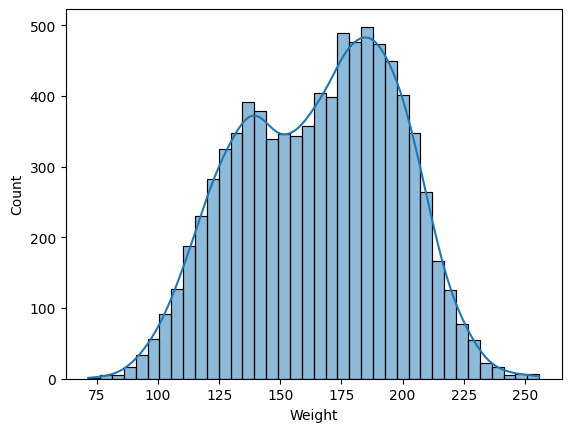

In [18]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [19]:
#One Hot Encoding
#true means it will drop one dummy variable
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)

In [20]:
dummy_variables

,Male
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [21]:
new_df = remove_out_columns.drop('Gender',axis=1)

In [22]:
new_df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [23]:
#Concat two data frame
df = pd.concat([new_df,dummy_variables], axis=1)

In [24]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [25]:
df.tail()

,Height,Weight,Male
8550,60.483946,110.565497,0
8551,63.423372,129.921671,0
8552,65.584057,155.942671,0
8553,67.429971,151.678405,0
8554,60.921791,131.253738,0


In [26]:
x = df.drop('Height', axis=1)
y = df['Height']

In [27]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [28]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [29]:
#split dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [30]:
xtrain.shape

(5985, 2)

In [31]:
xtest.shape

(2566, 2)

In [32]:
#create linear reg object
reg  = LinearRegression()

In [33]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [34]:
# coefficient in linear regression
reg.coef_

array([ 0.1234468 , -0.98660239])

In [35]:
# value of intercept
reg.intercept_

46.931282041230475

In [36]:
reg.predict(xtest)

array([65.72126577, 64.78641032, 67.79522705, ..., 69.00211426,
       68.04828346, 70.28684906])

In [37]:
reg.predict(xtest).shape

(2566,)

In [38]:
pred = reg.predict(xtest)

In [39]:
mean_squared_error(ytest, pred)

2.1145208634701906

In [40]:
r2_score(ytest,pred)

0.8578364407986426